The goal is to find correlations between how well students do in school and other factors. The data set we will be using is from portugese schools in the subject of math.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm                          # statsmodels logistic regression
from sklearn.linear_model import LogisticRegression   # sklearn logistic regression
from sklearn import metrics
import seaborn as sn

In [2]:
math_df = pd.read_csv('student-mat.csv',delimiter = ';')
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


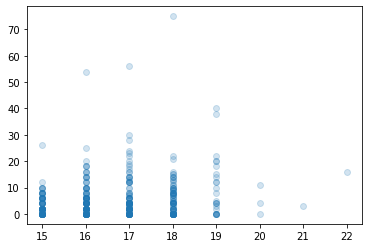

In [3]:
plt.scatter(math_df['age'],math_df['absences'],alpha = .2)

In [4]:
def data_scrubber(df,names):
    """
    This function replaces the string values with numerical values.
        Input: Dataframe. A list of column names to turn from strings into intergers.
        Output: Dataframe, where the columns in the 'names' argument are now intergers.
    """
    for name in names:
        values = df[name].unique()
        df[name].replace(values,range(0,values.size),inplace = True)
    return df

In [5]:
numerical_df = math_df.copy()
numerical_df.replace(['no','yes'], [0,1], inplace=True)  #Replace the boolean yes/no values.
numerical_df = data_scrubber(numerical_df,['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian'])

array([[<AxesSubplot:title={'center':'school'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'address'}>,
        <AxesSubplot:title={'center':'famsize'}>,
        <AxesSubplot:title={'center':'Pstatus'}>],
       [<AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'Mjob'}>,
        <AxesSubplot:title={'center':'Fjob'}>,
        <AxesSubplot:title={'center':'reason'}>,
        <AxesSubplot:title={'center':'guardian'}>],
       [<AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'schoolsup'}>,
        <AxesSubplot:title={'center':'famsup'}>,
        <AxesSubplot:title={'center':'paid'}>],
       [<AxesSubplot:title={'center':'activities'}>,
        <AxesSubplot:title={'center':'nursery'}>,
        <Ax

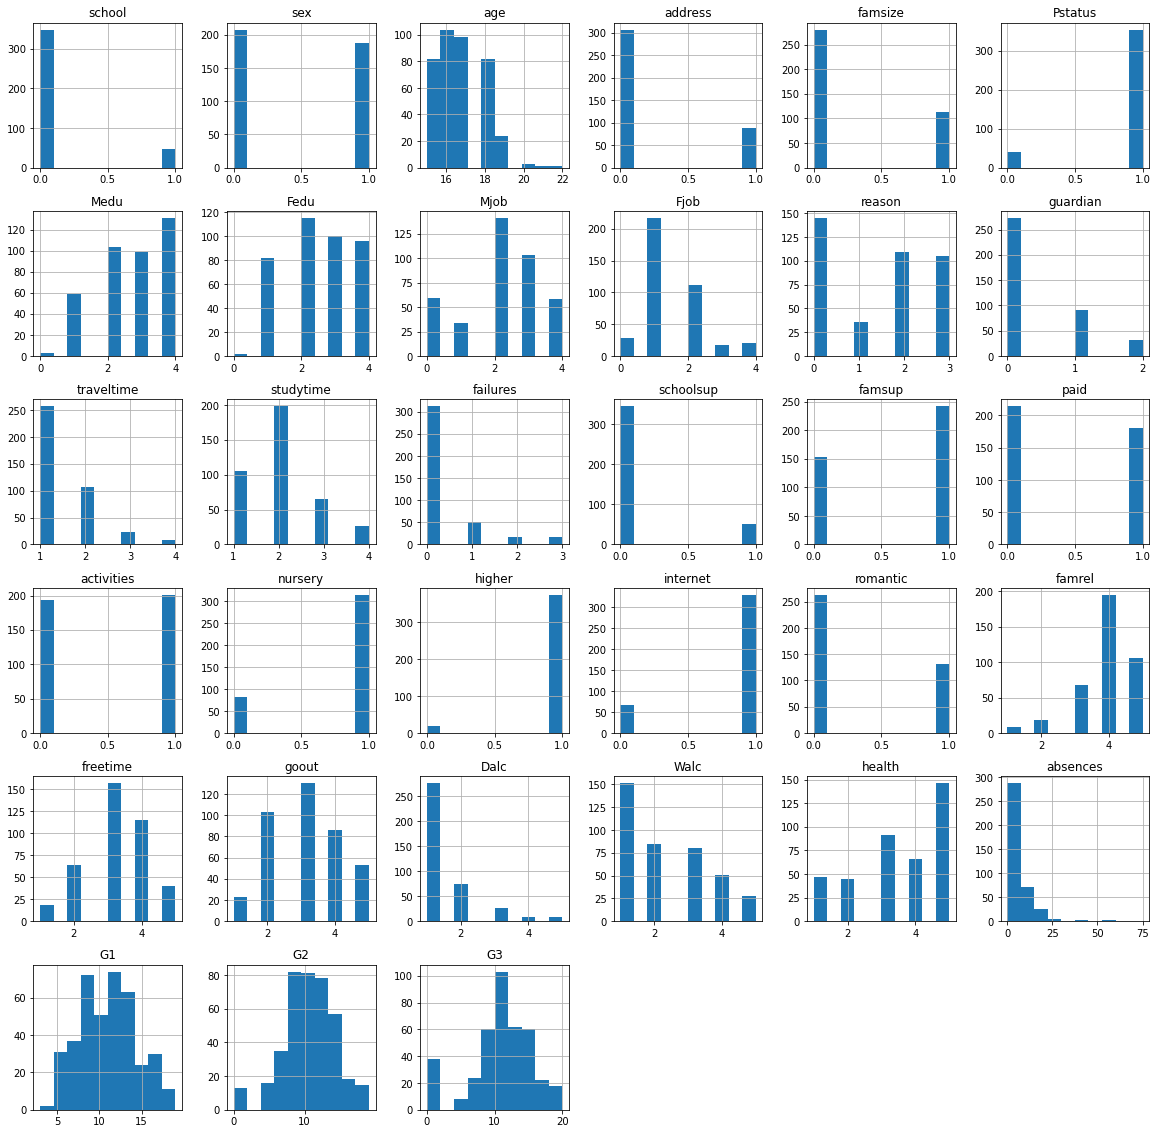

In [6]:
numerical_df.hist(figsize=(20,20))

In [8]:
numerical_df['G3'] = numerical_df['G3']/20
X = numerical_df[['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences']]
Y = numerical_df['G3']
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.75,test_size=0.25,random_state=1)
logit_model = sm.Logit(y_train, sm.add_constant(x_train))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.626996
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     G3   No. Observations:                  296
Model:                          Logit   Df Residuals:                      265
Method:                           MLE   Df Model:                           30
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                 0.08770
Time:                        21:40:15   Log-Likelihood:                -185.59
converged:                       True   LL-Null:                       -203.43
Covariance Type:            nonrobust   LLR p-value:                    0.2187
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7901      2.456      0.322      0.748      -4.023       5.603
school         0.2121      0.

In [15]:
numerical_df.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.073473,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,-0.098553,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,0.051596,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,0.279797,0.028504,0.146722,1.000000,-0.072472,0.042572,-0.138804,-0.072178,-0.108818,-0.045578,...,-0.014258,-0.034878,-0.068835,0.093494,0.101126,0.040355,0.027874,-0.069704,-0.126037,-0.105756
famsize,0.064866,0.089862,0.037847,-0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,0.066836,...,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.013789,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,-0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,-0.107865,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,-0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,-0.041505,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,-0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,-0.056233,...,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.073473,-0.098553,0.051596,-0.045578,0.066836,0.013789,-0.107865,-0.041505,-0.056233,1.000000,...,0.002908,-0.002596,-0.041972,0.023638,-0.050560,-0.001413,-0.010758,0.000192,-0.000818,-0.019246


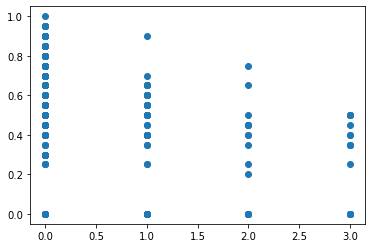

In [16]:
#Highest negative correlation: Failures
plt.scatter(numerical_df["failures"],numerical_df["G3"])

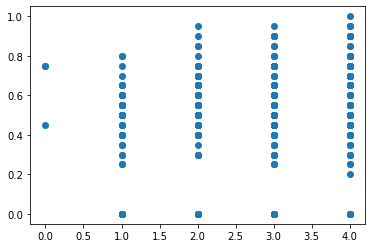

In [17]:
#Highest positive correlation: Mother education
plt.scatter(numerical_df["Medu"],numerical_df["G3"])